In [1]:
library(ggplot2)


In [2]:
library(extRemes)

Loading required package: Lmoments

Loading required package: distillery


Attaching package: 'extRemes'


The following objects are masked from 'package:stats':

    qqnorm, qqplot




In [3]:
data <- c(-0.77,-0.74,-0.66,-0.6,-0.81,-0.71,-0.76,-0.76)

In [4]:
datafit <- fevd(data, type="Gumbel")
datafit


fevd(x = data, type = "Gumbel")

[1] "Estimation Method used: MLE"


 Negative Log-Likelihood Value:  -11.46844 


 Estimated parameters:
   location       scale 
-0.75512634  0.04816946 

 Standard Error Estimates:
  location      scale 
0.01789754 0.01372447 

 Estimated parameter covariance matrix.
             location        scale
location 3.203219e-04 7.555403e-05
scale    7.555403e-05 1.883610e-04

 AIC = -18.93689 

 BIC = -18.778 

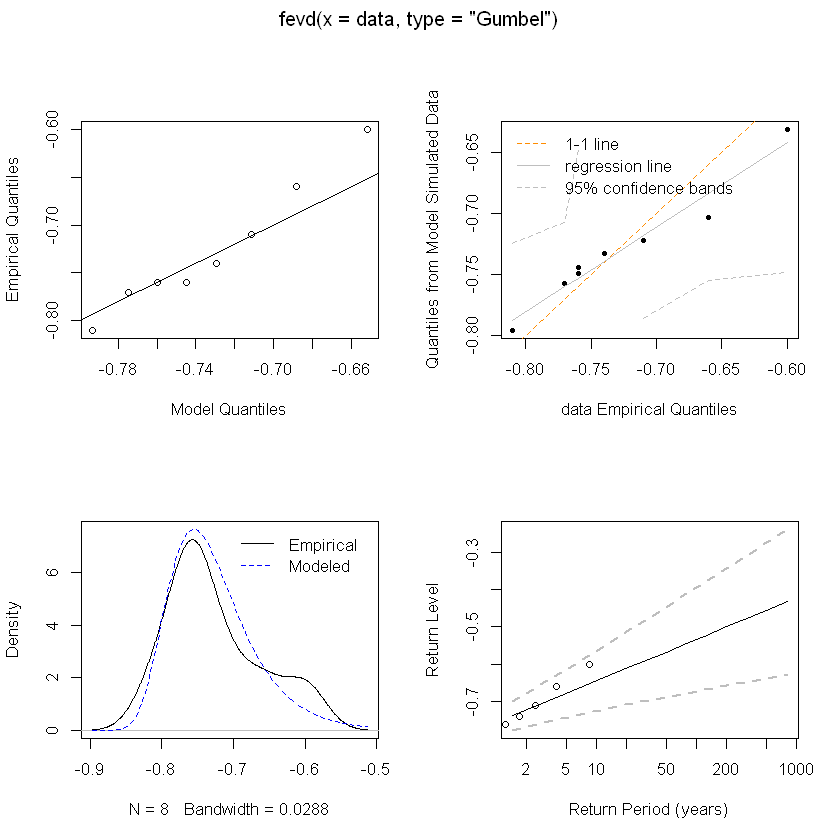

In [5]:
plot(datafit)

In [6]:
return.level(datafit)

fevd(x = data, type = "Gumbel")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period)

 Gumbel model fitted to  data  
Data are assumed to be  stationary 
[1] "Return Levels for period units in years"
  2-year level  20-year level 100-year level 
    -0.7374716     -0.6120536     -0.5335396 

In [17]:
return.level(datafit, conf = 0.05, rperiods= c(10,100,210,510,810,980), make.plot = TRUE)

fevd(x = data, type = "Gumbel")
get(paste("return.level.fevd.", newcl, sep = ""))(x = x, return.period = return.period, 
    conf = 0.05, rperiods = ..2, make.plot = TRUE)

 Gumbel model fitted to  data  
Data are assumed to be  stationary 
[1] "Return Levels for period units in years"
  2-year level  20-year level 100-year level 
    -0.7374716     -0.6120536     -0.5335396 

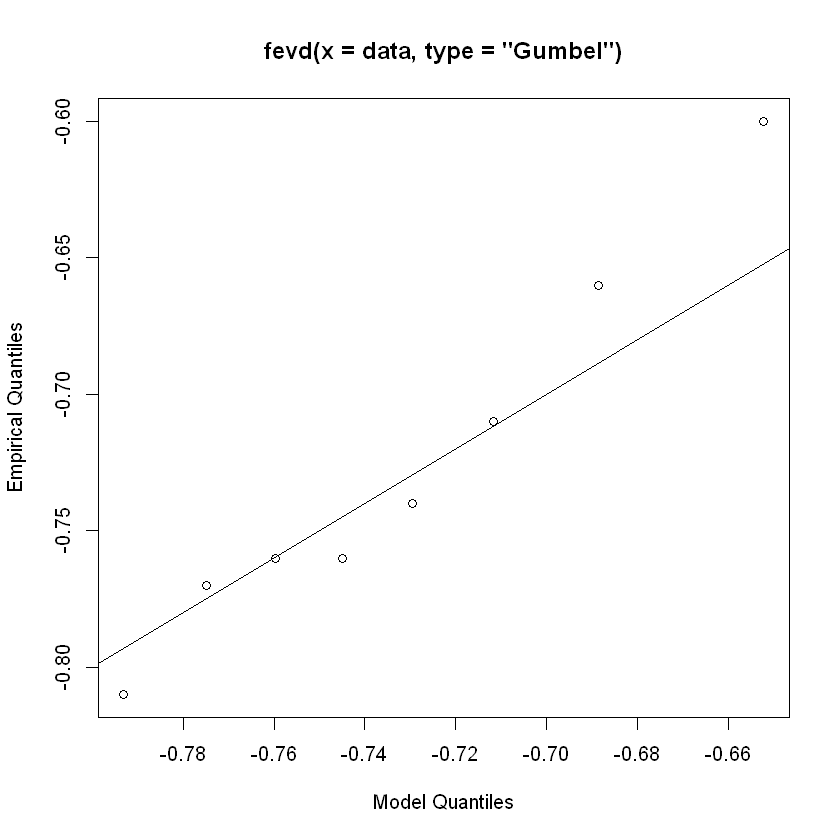

In [18]:
plot(datafit, "qq")

https://ulysse-pasquier.com/post/r-plotting-results-from-extremes-package-extreme-value-analysis/

In [19]:
datagrabber(datafit)

y
-0.77
-0.74
-0.66
-0.60
-0.81
-0.71
-0.76
-0.76


In [21]:
ppoints(datafit$n,a=0)

[1] 0.1111111 0.2222222 0.3333333 0.4444444 0.5555556 0.6666667 0.7777778
[8] 0.8888889

In [10]:
getrlpoints <- function(fit){

xp2 <- ppoints(fit$n, a = 0)
ytmp <- datagrabber(fit)
y <- c(ytmp[, 1])
sdat <- sort(y)
npy <- fit$npy
u <- fit$threshold
rlpoints.x <- -1/log(xp2)[sdat > u]/npy
rlpoints.y <- sdat[sdat > u]
rlpoints <- data.frame(rlpoints.x, rlpoints.y)

return(rlpoints)
}

In [11]:
getcidf <- function(fit){

rperiods = c(2, 5, 10, 20, 50, 80, 100, 120, 200, 250, 300, 500, 800)
bds <- ci(fit, return.period = rperiods)
c1 <- as.numeric(bds[,1])
c2 <- as.numeric(bds[,2])
c3 <- as.numeric(bds[,3])
ci_df <- data.frame(c1, c2, c3, rperiods) 

return(ci_df)
}

In [12]:
rlpoints <- getrlpoints(datafit)
ci_df <- getcidf(datafit)

In [13]:
rlpoints

rlpoints.x,rlpoints.y
<dbl>,<dbl>


In [14]:
ci_df

c1,c2,c3,rperiods
<dbl>,<dbl>,<dbl>,<dbl>
-0.7767202,-0.7374716,-0.6982230,2
-0.7439415,-0.6828750,-0.6218086,5
-0.7254745,-0.6467274,-0.5679802,10
-0.7086875,-0.6120536,-0.5154198,20
-0.6876382,-0.5671720,-0.4467059,50
-0.6771083,-0.5443491,-0.4115899,80
-0.6721497,-0.5335396,-0.3949296,100
-0.6681137,-0.5247168,-0.3813199,120
-0.6568670,-0.5000299,-0.3431928,200


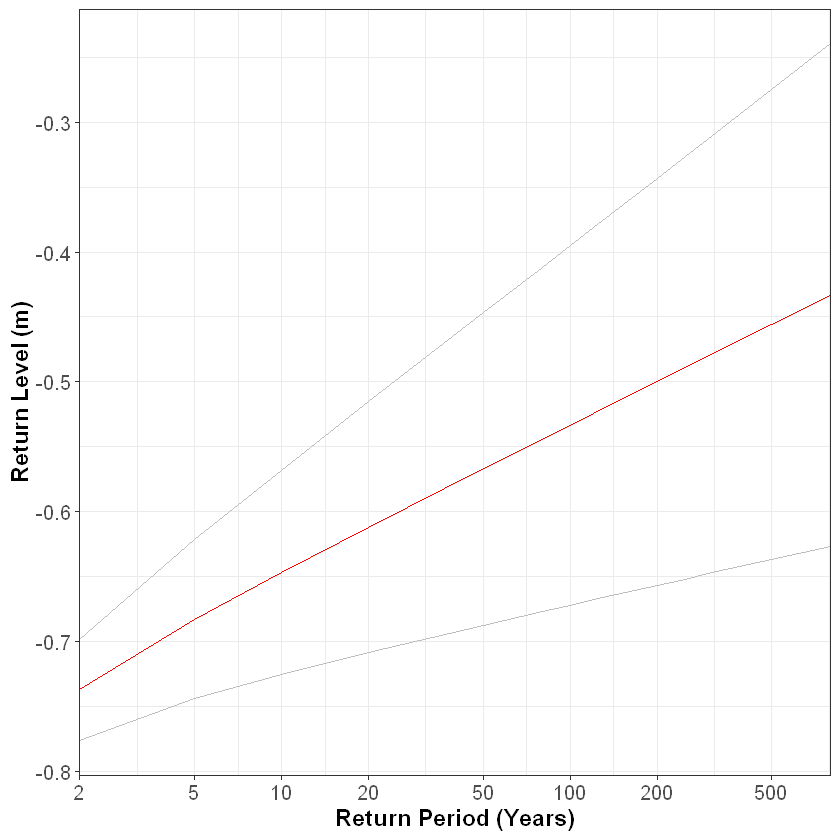

In [15]:
ggplot() +
  geom_line(data = ci_df, aes(x = rperiods, y = c2), color = "red") +
  geom_line(data = ci_df, aes(x = rperiods, y = c1), color = "grey") +
  geom_line(data = ci_df, aes(x = rperiods, y = c3), color = "grey") +
  geom_point(data = rlpoints, aes(x = rlpoints.x, y = rlpoints.y), size = 1) +
  ylab("Return Level (m)") +
  xlab("Return Period (Years)") +
  scale_x_log10(expand = c(0, 0), breaks = c(2,5,10,20,50,100,200,500)) +
  theme_bw() +
  theme(axis.text = element_text(size=12), axis.title = element_text(size = 14, face = "bold"))